## 상관관계

#### 키와 몸무게 간의 관계

In [41]:
import pandas as pd
from scipy.stats import pearsonr

# 예시 데이터
data = {
    'height': [160, 165, 170, 175, 180],
    'weight': [50, 55, 65, 70, 80]
}
df = pd.DataFrame(data)

# 피어슨 상관계수 계산
corr, p_value = pearsonr(df['height'], df['weight'])

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")


피어슨 상관계수: 0.99
p-값: 0.0006


#### 스트레스와 우울에 대한 상관관계

In [84]:
import pandas as pd
from scipy.stats import pearsonr
import matplotlib.pyplot as plt

# 1. 엑셀 파일 읽기 (필요 없는 행이 있다면 skiprows, header 옵션 활용)
# 예: 컬럼명이 7번째 줄에 있다면, skiprows=6, header=0
df = pd.read_excel('./datalab.xlsx', skiprows=0)   # 필요시 skiprows=6로 바꿔 시도

# 2. 컬럼명 확인 및 정리
print(df.columns)   # 실제 컬럼명 확인 (예: '날짜', '스트레스', '날짜.1', '우울')

# 3. 컬럼명 한글 → 영문(혹은 분석하기 편한 이름)으로 변경
df = df.rename(columns={
    '스트레스': 'stress',
    '우울': 'depress',
    '날짜': 'date'
})

# 4. 필요 컬럼만 추출 (중복 날짜가 있으면 하나만 남기기)
df = df[['date', 'stress', 'depress']]

# 5. 데이터 타입 변환 (문자열이면 int로 변환)
df['stress'] = df['stress'].astype(int)
df['depress'] = df['depress'].astype(int)

# 6. 상관계수 계산
corr, p_value = pearsonr(df['stress'], df['depress'])
corr_percent = abs(corr) * 100

print(f"피어슨 상관계수: {corr:.2f}")
print(f"p-값: {p_value:.4f}")
print(f"상관계수 (절대값 기준): {corr_percent:.1f}%")


Index(['날짜', '스트레스', '날짜.1', '우울'], dtype='object')
피어슨 상관계수: 0.55
p-값: 0.0000
상관계수 (절대값 기준): 55.4%


In [22]:
from matplotlib import rcParams
rcParams['font.family'] = 'Gulim'  #한글 깨짐 방지
rcParams['axes.unicode_minus'] = False     

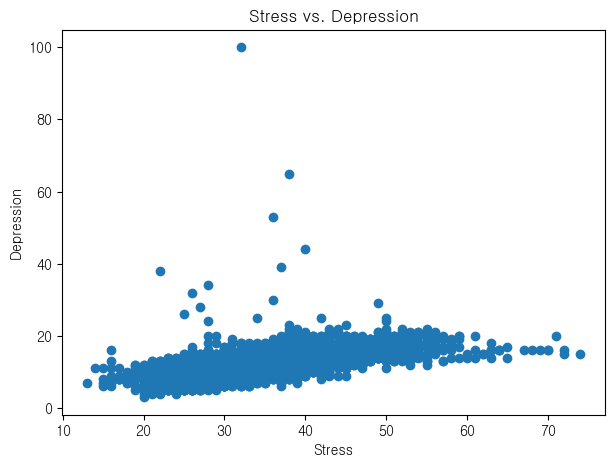

In [82]:
# 7. 산점도 시각화
plt.figure(figsize=(7,5))
plt.scatter(df['stress'], df['depress'])
plt.title(f"Stress vs. Depression")
plt.xlabel('Stress')
plt.ylabel('Depression')
plt.show()

#### 스피어만 상관계수

- 학생 성적 순위와 스포츠 성적 순위 간의 관계.

In [83]:
import pandas as pd
from scipy.stats import spearmanr

# 데이터프레임 구성
data = {
    'student': ['A', 'B', 'C', 'D', 'E'],
    'academic_rank': [1, 2, 3, 4, 5],
    'sports_rank': [4, 2, 1, 3, 5]
}
df = pd.DataFrame(data)

# 스피어만 상관계수 계산
rho, pval = spearmanr(df['academic_rank'], df['sports_rank'])

print(f"스피어만 상관계수: {rho:.3f}")
print(f"p-value: {pval:.4f}")


스피어만 상관계수: 0.300
p-value: 0.6238
